# Importing Data from drive

In [2]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '1Z6Qxr-q-F54iYB2G1AyoDymBh64f5REZ'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("real_Image_dataset_Detection.tar.7z")

## Extracting the file

In [ ]:
!7z x real_Image_dataset_Detection.tar.7z
!tar -xvf /content/real_Image_dataset_Detection.tar

In [ ]:
%cat /content/real_Image_dataset_Detection/readme.txt

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
img = cv2.imread("real_Image_dataset_Detection/Image/1.jpg")
cv2_imshow(img)

In [ ]:
%cat real_Image_dataset_Detection/Annotation/1.txt

# Importing the github library

In [ ]:
!git clone https://github.com/sergiomsilva/alpr-unconstrained

Cloning into 'alpr-unconstrained'...
remote: Enumerating objects: 290, done.
remote: Total 290 (delta 0), reused 0 (delta 0), pack-reused 290
Receiving objects: 100% (290/290), 2.62 MiB | 2.11 MiB/s, done.
Resolving deltas: 100% (91/91), done.


In [ ]:
%cd alpr-unconstrained/darknet/
!make

/content/alpr-unconstrained/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -fopenmp -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-re

In [ ]:
%cd /content/alpr-unconstrained/
!mkdir models

/content/alpr-unconstrained
mkdir: cannot create directory ‘models’: File exists


In [ ]:
!python create-model.py eccv models/eccv-model-scracth

Using TensorFlow backend.
Creating model eccv
W0828 12:56:19.970669 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 12:56:20.016458 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 12:56:20.017039 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 12:56:20.058427 140114987476864 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_sess

In [ ]:
#!rm training_samples/*
#!mv real_Image_dataset_Detection/Image/*.jpg training_samples/
#!mv real_Image_dataset_Detection/Annotation/*.txt training_samples/

In [ ]:
!python train-detector.py --model models/my-trained-model/my-trained-model_backup --name my-trained-model \
 --train-dir samples/train-detector --output-dir models/my-trained-model/ -op Adam -lr .0001 -its 300000 -bs 64

Using TensorFlow backend.
W0828 14:01:40.095638 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 14:01:40.179282 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 14:01:40.203507 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:01:40.203685 140650333063040 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828

In [ ]:
!cp samples/train-detector/1*.jpg /content/real_Image_dataset_Detection/Image/

In [ ]:
!python license-plate-detection.py /content/real_Image_dataset_Detection/Image/ /content/alpr-unconstrained/models/my-trained-model/my-trained-model_backup

Using TensorFlow backend.
W0828 14:18:53.194962 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0828 14:18:53.215127 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0828 14:18:53.320954 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:245: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0828 14:18:53.321214 140389948934016 deprecation_wrapper.py:119] From /usr/local/lib/python2.7/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0828

In [ ]:
%%writefile /content/alpr-unconstrained/license-plate-detection.py

import sys, os
import keras
import cv2
import traceback

from src.keras_utils 			import load_model
from glob 						import glob
from os.path 					import splitext, basename
from src.utils 					import im2single
from src.keras_utils 			import load_model, detect_lp
from src.label 					import Shape, writeShapes


def adjust_pts(pts,lroi):
	return pts*lroi.wh().reshape((2,1)) + lroi.tl().reshape((2,1))


if __name__ == '__main__':

	try:

		input_dir  = sys.argv[1]
		output_dir = input_dir

		lp_threshold = .5

		wpod_net_path = sys.argv[2]
		wpod_net = load_model(wpod_net_path)

		imgs_paths = glob('%s/*' % input_dir)

		print 'Searching for license plates using WPOD-NET'

		for i,img_path in enumerate(imgs_paths):

			print '\t Processing %s' % img_path

			bname = splitext(basename(img_path))[0]
			Ivehicle = cv2.imread(img_path)

			ratio = float(max(Ivehicle.shape[:2]))/min(Ivehicle.shape[:2])
			side  = int(ratio*288.)
			bound_dim = min(side + (side%(2**4)),608)
			print "\t\tBound dim: %d, ratio: %f" % (bound_dim,ratio)

			Llp,LlpImgs,_ = detect_lp(wpod_net,im2single(Ivehicle),bound_dim,2**4,(240,80),lp_threshold)

			if len(LlpImgs):
				Ilp = LlpImgs[0]
				Ilp = cv2.cvtColor(Ilp, cv2.COLOR_BGR2GRAY)
				Ilp = cv2.cvtColor(Ilp, cv2.COLOR_GRAY2BGR)

				s = Shape(Llp[0].pts)

				cv2.imwrite('%s/%s_lp.png' % (output_dir,bname),Ilp*255.)
				writeShapes('%s/%s_lp.txt' % (output_dir,bname),[s])

	except:
		traceback.print_exc()
		sys.exit(1)

	sys.exit(0)


Overwriting /content/alpr-unconstrained/license-plate-detection.py


In [ ]:
%%writefile /content/alpr-unconstrained/src/label.py

import numpy as np

from os.path import isfile


class Label:

	def __init__(self,cl=-1,tl=np.array([0.,0.]),br=np.array([0.,0.]),prob=None):
		self.__tl 	= tl
		self.__br 	= br
		self.__cl 	= cl
		self.__prob = prob

	def __str__(self):
		return 'Class: %d, top_left(x:%f,y:%f), bottom_right(x:%f,y:%f)' % (self.__cl, self.__tl[0], self.__tl[1], self.__br[0], self.__br[1])

	def copy(self):
		return Label(self.__cl,self.__tl,self.__br)

	def wh(self): return self.__br-self.__tl

	def cc(self): return self.__tl + self.wh()/2

	def tl(self): return self.__tl

	def br(self): return self.__br

	def tr(self): return np.array([self.__br[0],self.__tl[1]])

	def bl(self): return np.array([self.__tl[0],self.__br[1]])

	def cl(self): return self.__cl

	def area(self): return np.prod(self.wh())

	def prob(self): return self.__prob

	def set_class(self,cl):
		self.__cl = cl

	def set_tl(self,tl):
		self.__tl = tl

	def set_br(self,br):
		self.__br = br

	def set_wh(self,wh):
		cc = self.cc()
		self.__tl = cc - .5*wh
		self.__br = cc + .5*wh

	def set_prob(self,prob):
		self.__prob = prob


def lread(file_path,label_type=Label):

	if not isfile(file_path):
		return []

	objs = []
	with open(file_path,'r') as fd:
		for line in fd:
			v 		= line.strip().split()
			cl 		= int(v[0])
			ccx,ccy = float(v[1]),float(v[2])
			w,h 	= float(v[3]),float(v[4])
			prob 	= float(v[5]) if len(v) == 6 else None

			cc 	= np.array([ccx,ccy])
			wh 	= np.array([w,h])

			objs.append(label_type(cl,cc-wh/2,cc+wh/2,prob=prob))

	return objs

def lwrite(file_path,labels,write_probs=True):
	with open(file_path,'w') as fd:
		for l in labels:
			cc,wh,cl,prob = (l.cc(),l.wh(),l.cl(),l.prob())
			if prob != None and write_probs:
				fd.write('%d %f %f %f %f %f\n' % (cl,cc[0],cc[1],wh[0],wh[1],prob))
			else:
				fd.write('%d %f %f %f %f\n' % (cl,cc[0],cc[1],wh[0],wh[1]))


def dknet_label_conversion(R,img_width,img_height):
	WH = np.array([img_width,img_height],dtype=float)
	L  = []
	for r in R:
		center = np.array(r[2][:2])/WH
		wh2 = (np.array(r[2][2:])/WH)*.5
		L.append(Label(ord(r[0]),tl=center-wh2,br=center+wh2,prob=r[1]))
	return L


class Shape():

	def __init__(self,pts=np.zeros((2,0)),max_sides=4,text=''):
		self.pts = pts
		self.max_sides = max_sides
		self.text = text

	def isValid(self):
		return self.pts.shape[1] > 2

	def write(self,fp):
		fp.write('%d,' % self.pts.shape[1])
		ptsarray = self.pts.flatten()
		fp.write(''.join([('%f,' % value) for value in ptsarray]))
		fp.write('%s,' % self.text)
		fp.write('\n')

	def read(self,line):
		data 		= line.strip().split(',')
		ss 			= 4
		values 		= data[:ss*2]
		text 		= data[-1].split("::")[-1]
		self.pts 	= np.array([float(value) for value in values]).reshape((2,ss))
		self.text   = text

def readShapes(path,obj_type=Shape):
	shapes = []
	with open(path) as fp:
		for line in fp:
			shape = obj_type()
			shape.read(line)
			shapes.append(shape)
	return shapes

def writeShapes(path,shapes):
	if len(shapes):
		with open(path,'w') as fp:
			for shape in shapes:
				if shape.isValid():
					shape.write(fp)

Overwriting /content/alpr-unconstrained/src/label.py


# With East

In [ ]:
!git clone https://github.com/argman/EAST/

In [ ]:
%cd EAST/

In [ ]:
#https://drive.google.com/open?id=0B3APw5BZJ67ETHNPaU9xUkVoV0U
  # A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = '0B3APw5BZJ67ETHNPaU9xUkVoV0U'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile("weights.zip")

In [ ]:
!unzip weights.zip

In [ ]:
#!rm /tmp/east_icdar2015_resnet_v1_50_rbox/*

In [ ]:
!cp /content/EAST/east_icdar2015_resnet_v1_50_rbox/checkpoint /tmp/east_icdar2015_resnet_v1_50_rbox/

In [ ]:
!rm training_samples/*
!mv /content/real_Image_dataset_Detection/Image/*.jpg training_samples/
!mv /content/real_Image_dataset_Detection/Annotation/*.txt training_samples/

In [ ]:
!python multigpu_train.py --gpu_list=0 --input_size=512 --batch_size_per_gpu=14 --checkpoint_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/ \
--text_scale=512 --training_data_path=training_samples/ --geometry=RBOX --learning_rate=0.0001 --num_readers=1 \
--pretrained_model_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/model.ckpt-49491

In [ ]:
%%writefile multigpu_train.py

from tqdm import tqdm
import time
import numpy as np
import tensorflow as tf
from tensorflow.contrib import slim

tf.app.flags.DEFINE_integer('input_size', 512, '')
tf.app.flags.DEFINE_integer('batch_size_per_gpu', 14, '')
tf.app.flags.DEFINE_integer('num_readers', 16, '')
tf.app.flags.DEFINE_float('learning_rate', 0.0001, '')
tf.app.flags.DEFINE_integer('max_steps', 100000, '')
tf.app.flags.DEFINE_float('moving_average_decay', 0.997, '')
tf.app.flags.DEFINE_string('gpu_list', '1', '')
tf.app.flags.DEFINE_string('checkpoint_path', '/tmp/east_resnet_v1_50_rbox/', '')
tf.app.flags.DEFINE_boolean('restore', False, 'whether to resotre from checkpoint')
tf.app.flags.DEFINE_integer('save_checkpoint_steps', 50, '')
tf.app.flags.DEFINE_integer('save_summary_steps', 100, '')
tf.app.flags.DEFINE_string('pretrained_model_path', None, '')

import model
import icdar

FLAGS = tf.app.flags.FLAGS

gpus = list(range(len(FLAGS.gpu_list.split(','))))


def tower_loss(images, score_maps, geo_maps, training_masks, reuse_variables=None):
    # Build inference graph
    with tf.variable_scope(tf.get_variable_scope(), reuse=reuse_variables):
        f_score, f_geometry = model.model(images, is_training=True)

    model_loss = model.loss(score_maps, f_score,
                            geo_maps, f_geometry,
                            training_masks)
    total_loss = tf.add_n([model_loss] + tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES))

    # add summary
    if reuse_variables is None:
        tf.summary.image('input', images)
        tf.summary.image('score_map', score_maps)
        tf.summary.image('score_map_pred', f_score * 255)
        tf.summary.image('geo_map_0', geo_maps[:, :, :, 0:1])
        tf.summary.image('geo_map_0_pred', f_geometry[:, :, :, 0:1])
        tf.summary.image('training_masks', training_masks)
        tf.summary.scalar('model_loss', model_loss)
        tf.summary.scalar('total_loss', total_loss)

    return total_loss, model_loss


def average_gradients(tower_grads):
    average_grads = []
    for grad_and_vars in zip(*tower_grads):
        grads = []
        for g, _ in grad_and_vars:
            expanded_g = tf.expand_dims(g, 0)
            grads.append(expanded_g)

        grad = tf.concat(grads, 0)
        grad = tf.reduce_mean(grad, 0)

        v = grad_and_vars[0][1]
        grad_and_var = (grad, v)
        average_grads.append(grad_and_var)

    return average_grads


def main(argv=None):
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS.gpu_list
    if not tf.gfile.Exists(FLAGS.checkpoint_path):
        tf.gfile.MkDir(FLAGS.checkpoint_path)
    else:
        if not FLAGS.restore:
            tf.gfile.DeleteRecursively(FLAGS.checkpoint_path)
            tf.gfile.MkDir(FLAGS.checkpoint_path)

    input_images = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='input_images')
    input_score_maps = tf.placeholder(tf.float32, shape=[None, None, None, 1], name='input_score_maps')
    if FLAGS.geometry == 'RBOX':
        input_geo_maps = tf.placeholder(tf.float32, shape=[None, None, None, 5], name='input_geo_maps')
    else:
        input_geo_maps = tf.placeholder(tf.float32, shape=[None, None, None, 8], name='input_geo_maps')
    input_training_masks = tf.placeholder(tf.float32, shape=[None, None, None, 1], name='input_training_masks')

    global_step = tf.get_variable('global_step', [], initializer=tf.constant_initializer(0), trainable=False)
    learning_rate = tf.train.exponential_decay(FLAGS.learning_rate, global_step, decay_steps=10000, decay_rate=0.94, staircase=True)
    # add summary
    tf.summary.scalar('learning_rate', learning_rate)
    opt = tf.train.AdamOptimizer(learning_rate)
    # opt = tf.train.MomentumOptimizer(learning_rate, 0.9)


    # split
    input_images_split = tf.split(input_images, len(gpus))
    input_score_maps_split = tf.split(input_score_maps, len(gpus))
    input_geo_maps_split = tf.split(input_geo_maps, len(gpus))
    input_training_masks_split = tf.split(input_training_masks, len(gpus))

    tower_grads = []
    reuse_variables = None
    for i, gpu_id in enumerate(gpus):
        with tf.device('/gpu:%d' % gpu_id):
            with tf.name_scope('model_%d' % gpu_id) as scope:
                iis = input_images_split[i]
                isms = input_score_maps_split[i]
                igms = input_geo_maps_split[i]
                itms = input_training_masks_split[i]
                total_loss, model_loss = tower_loss(iis, isms, igms, itms, reuse_variables)
                batch_norm_updates_op = tf.group(*tf.get_collection(tf.GraphKeys.UPDATE_OPS, scope))
                reuse_variables = True

                grads = opt.compute_gradients(total_loss)
                tower_grads.append(grads)

    grads = average_gradients(tower_grads)
    apply_gradient_op = opt.apply_gradients(grads, global_step=global_step)

    summary_op = tf.summary.merge_all()
    # save moving average
    variable_averages = tf.train.ExponentialMovingAverage(
        FLAGS.moving_average_decay, global_step)
    variables_averages_op = variable_averages.apply(tf.trainable_variables())
    # batch norm updates
    with tf.control_dependencies([variables_averages_op, apply_gradient_op, batch_norm_updates_op]):
        train_op = tf.no_op(name='train_op')

    saver = tf.train.Saver(tf.global_variables())
    summary_writer = tf.summary.FileWriter(FLAGS.checkpoint_path, tf.get_default_graph())

    init = tf.global_variables_initializer()

    if FLAGS.pretrained_model_path is not None:
        variable_restore_op = slim.assign_from_checkpoint_fn(FLAGS.pretrained_model_path, slim.get_trainable_variables(),
                                                             ignore_missing_vars=True)
    with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
        if FLAGS.restore:
            print('continue training from previous checkpoint')
            print(FLAGS.checkpoint_path)
            ckpt = tf.train.latest_checkpoint(FLAGS.checkpoint_path)
            saver.restore(sess, ckpt)
        else:
            sess.run(init)
            if FLAGS.pretrained_model_path is not None:
                variable_restore_op(sess)

        data_generator = icdar.get_batch(num_workers=FLAGS.num_readers,
                                         input_size=FLAGS.input_size,
                                         batch_size=FLAGS.batch_size_per_gpu * len(gpus))

        start = time.time()
        for step in tqdm(range(FLAGS.max_steps)):
            data = next(data_generator)
            ml, tl, _ = sess.run([model_loss, total_loss, train_op], feed_dict={input_images: data[0],
                                                                                input_score_maps: data[2],
                                                                                input_geo_maps: data[3],
                                                                                input_training_masks: data[4]})
            if np.isnan(tl):
                print('Loss diverged, stop training')
                break

            if step % 10 == 0:
                avg_time_per_step = (time.time() - start)/10
                avg_examples_per_second = (10 * FLAGS.batch_size_per_gpu * len(gpus))/(time.time() - start)
                start = time.time()
                print('Step {:06d}, model loss {:.4f}, total loss {:.4f}, {:.2f} seconds/step, {:.2f} examples/second'.format(
                    step, ml, tl, avg_time_per_step, avg_examples_per_second))

            if step % FLAGS.save_checkpoint_steps == 0:
                saver.save(sess, FLAGS.checkpoint_path + 'model.ckpt', global_step=global_step)

            if step % FLAGS.save_summary_steps == 0:
                _, tl, summary_str = sess.run([train_op, total_loss, summary_op], feed_dict={input_images: data[0],
                                                                                             input_score_maps: data[2],
                                                                                             input_geo_maps: data[3],
                                                                                             input_training_masks: data[4]})
                summary_writer.add_summary(summary_str, global_step=step)

if __name__ == '__main__':
    tf.app.run()



In [ ]:
%%writefile icdar.py

# coding:utf-8
import glob
import csv
import cv2
import time
import os
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
import matplotlib.patches as Patches
from shapely.geometry import Polygon

import tensorflow as tf

from data_util import GeneratorEnqueuer

tf.app.flags.DEFINE_string('training_data_path', '/data/ocr/icdar2015/',
                           'training dataset to use')
tf.app.flags.DEFINE_integer('max_image_large_side', 1280,
                            'max image size of training')
tf.app.flags.DEFINE_integer('max_text_size', 800,
                            'if the text in the input image is bigger than this, then we resize'
                            'the image according to this')
tf.app.flags.DEFINE_integer('min_text_size', 10,
                            'if the text size is smaller than this, we ignore it during training')
tf.app.flags.DEFINE_float('min_crop_side_ratio', 0.1,
                          'when doing random crop from input image, the'
                          'min length of min(H, W')
tf.app.flags.DEFINE_string('geometry', 'RBOX',
                           'which geometry to generate, RBOX or QUAD')


FLAGS = tf.app.flags.FLAGS


def get_images():
    files = []
    for ext in ['jpg', 'png', 'jpeg', 'JPG']:
        files.extend(glob.glob(
            os.path.join(FLAGS.training_data_path, '*.{}'.format(ext))))
    return files


def load_annoataion(p):
    '''
    load annotation from the text file
    :param p:
    :return:
    '''
    text_polys = []
    text_tags = []
    if not os.path.exists(p):
        return np.array(text_polys, dtype=np.float32)
    with open(p, 'r') as f:
        reader = csv.reader(f)
        for line in reader:
            label = line[-1]
            # strip BOM. \ufeff for python3,  \xef\xbb\bf for python2
            line = [i.strip('\ufeff').strip('\xef\xbb\xbf') for i in line]

            x1, y1, x2, y2, x3, y3, x4, y4 = list(map(float, line[:8]))
            text_polys.append([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
            if label == '*' or label == '###':
                text_tags.append(True)
            else:
                text_tags.append(False)
        return np.array(text_polys, dtype=np.float32), np.array(text_tags, dtype=np.bool)


def polygon_area(poly):
    '''
    compute area of a polygon
    :param poly:
    :return:
    '''
    edge = [
        (poly[1][0] - poly[0][0]) * (poly[1][1] + poly[0][1]),
        (poly[2][0] - poly[1][0]) * (poly[2][1] + poly[1][1]),
        (poly[3][0] - poly[2][0]) * (poly[3][1] + poly[2][1]),
        (poly[0][0] - poly[3][0]) * (poly[0][1] + poly[3][1])
    ]
    return np.sum(edge)/2.


def check_and_validate_polys(polys, tags, xxx_todo_changeme):
    '''
    check so that the text poly is in the same direction,
    and also filter some invalid polygons
    :param polys:
    :param tags:
    :return:
    '''
    (h, w) = xxx_todo_changeme
    if polys.shape[0] == 0:
        return polys
    polys[:, :, 0] = np.clip(polys[:, :, 0], 0, w-1)
    polys[:, :, 1] = np.clip(polys[:, :, 1], 0, h-1)

    validated_polys = []
    validated_tags = []
    for poly, tag in zip(polys, tags):
        p_area = polygon_area(poly)
        if abs(p_area) < 1:
            # print poly
            print('invalid poly')
            continue
        if p_area > 0:
            #print('poly in wrong direction')
            poly = poly[(0, 3, 2, 1), :]
        validated_polys.append(poly)
        validated_tags.append(tag)
    return np.array(validated_polys), np.array(validated_tags)


def crop_area(im, polys, tags, crop_background=False, max_tries=50):
    '''
    make random crop from the input image
    :param im:
    :param polys:
    :param tags:
    :param crop_background:
    :param max_tries:
    :return:
    '''
    h, w, _ = im.shape
    pad_h = h//10
    pad_w = w//10
    h_array = np.zeros((h + pad_h*2), dtype=np.int32)
    w_array = np.zeros((w + pad_w*2), dtype=np.int32)
    for poly in polys:
        poly = np.round(poly, decimals=0).astype(np.int32)
        minx = np.min(poly[:, 0])
        maxx = np.max(poly[:, 0])
        w_array[minx+pad_w:maxx+pad_w] = 1
        miny = np.min(poly[:, 1])
        maxy = np.max(poly[:, 1])
        h_array[miny+pad_h:maxy+pad_h] = 1
    # ensure the cropped area not across a text
    h_axis = np.where(h_array == 0)[0]
    w_axis = np.where(w_array == 0)[0]
    if len(h_axis) == 0 or len(w_axis) == 0:
        return im, polys, tags
    for i in range(max_tries):
        xx = np.random.choice(w_axis, size=2)
        xmin = np.min(xx) - pad_w
        xmax = np.max(xx) - pad_w
        xmin = np.clip(xmin, 0, w-1)
        xmax = np.clip(xmax, 0, w-1)
        yy = np.random.choice(h_axis, size=2)
        ymin = np.min(yy) - pad_h
        ymax = np.max(yy) - pad_h
        ymin = np.clip(ymin, 0, h-1)
        ymax = np.clip(ymax, 0, h-1)
        if xmax - xmin < FLAGS.min_crop_side_ratio*w or ymax - ymin < FLAGS.min_crop_side_ratio*h:
            # area too small
            continue
        if polys.shape[0] != 0:
            poly_axis_in_area = (polys[:, :, 0] >= xmin) & (polys[:, :, 0] <= xmax) \
                                & (polys[:, :, 1] >= ymin) & (polys[:, :, 1] <= ymax)
            selected_polys = np.where(np.sum(poly_axis_in_area, axis=1) == 4)[0]
        else:
            selected_polys = []
        if len(selected_polys) == 0:
            # no text in this area
            if crop_background:
                return im[ymin:ymax+1, xmin:xmax+1, :], polys[selected_polys], tags[selected_polys]
            else:
                continue
        im = im[ymin:ymax+1, xmin:xmax+1, :]
        polys = polys[selected_polys]
        tags = tags[selected_polys]
        polys[:, :, 0] -= xmin
        polys[:, :, 1] -= ymin
        return im, polys, tags

    return im, polys, tags


def shrink_poly(poly, r):
    '''
    fit a poly inside the origin poly, maybe bugs here...
    used for generate the score map
    :param poly: the text poly
    :param r: r in the paper
    :return: the shrinked poly
    '''
    # shrink ratio
    R = 0.3
    # find the longer pair
    if np.linalg.norm(poly[0] - poly[1]) + np.linalg.norm(poly[2] - poly[3]) > \
                    np.linalg.norm(poly[0] - poly[3]) + np.linalg.norm(poly[1] - poly[2]):
        # first move (p0, p1), (p2, p3), then (p0, p3), (p1, p2)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
        ## p0, p3
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
    else:
        ## p0, p3
        # print poly
        theta = np.arctan2((poly[3][0] - poly[0][0]), (poly[3][1] - poly[0][1]))
        poly[0][0] += R * r[0] * np.sin(theta)
        poly[0][1] += R * r[0] * np.cos(theta)
        poly[3][0] -= R * r[3] * np.sin(theta)
        poly[3][1] -= R * r[3] * np.cos(theta)
        ## p1, p2
        theta = np.arctan2((poly[2][0] - poly[1][0]), (poly[2][1] - poly[1][1]))
        poly[1][0] += R * r[1] * np.sin(theta)
        poly[1][1] += R * r[1] * np.cos(theta)
        poly[2][0] -= R * r[2] * np.sin(theta)
        poly[2][1] -= R * r[2] * np.cos(theta)
        ## p0, p1
        theta = np.arctan2((poly[1][1] - poly[0][1]), (poly[1][0] - poly[0][0]))
        poly[0][0] += R * r[0] * np.cos(theta)
        poly[0][1] += R * r[0] * np.sin(theta)
        poly[1][0] -= R * r[1] * np.cos(theta)
        poly[1][1] -= R * r[1] * np.sin(theta)
        ## p2, p3
        theta = np.arctan2((poly[2][1] - poly[3][1]), (poly[2][0] - poly[3][0]))
        poly[3][0] += R * r[3] * np.cos(theta)
        poly[3][1] += R * r[3] * np.sin(theta)
        poly[2][0] -= R * r[2] * np.cos(theta)
        poly[2][1] -= R * r[2] * np.sin(theta)
    return poly


def point_dist_to_line(p1, p2, p3):
    # compute the distance from p3 to p1-p2
    return np.linalg.norm(np.cross(p2 - p1, p1 - p3)) / np.linalg.norm(p2 - p1)


def fit_line(p1, p2):
    # fit a line ax+by+c = 0
    if p1[0] == p1[1]:
        return [1., 0., -p1[0]]
    else:
        [k, b] = np.polyfit(p1, p2, deg=1)
        return [k, -1., b]


def line_cross_point(line1, line2):
    # line1 0= ax+by+c, compute the cross point of line1 and line2
    if line1[0] != 0 and line1[0] == line2[0]:
        print('Cross point does not exist')
        return None
    if line1[0] == 0 and line2[0] == 0:
        print('Cross point does not exist')
        return None
    if line1[1] == 0:
        x = -line1[2]
        y = line2[0] * x + line2[2]
    elif line2[1] == 0:
        x = -line2[2]
        y = line1[0] * x + line1[2]
    else:
        k1, _, b1 = line1
        k2, _, b2 = line2
        x = -(b1-b2)/(k1-k2)
        y = k1*x + b1
    return np.array([x, y], dtype=np.float32)


def line_verticle(line, point):
    # get the verticle line from line across point
    if line[1] == 0:
        verticle = [0, -1, point[1]]
    else:
        if line[0] == 0:
            verticle = [1, 0, -point[0]]
        else:
            verticle = [-1./line[0], -1, point[1] - (-1/line[0] * point[0])]
    return verticle


def rectangle_from_parallelogram(poly):
    '''
    fit a rectangle from a parallelogram
    :param poly:
    :return:
    '''
    p0, p1, p2, p3 = poly
    angle_p0 = np.arccos(np.dot(p1-p0, p3-p0)/(np.linalg.norm(p0-p1) * np.linalg.norm(p3-p0)))
    if angle_p0 < 0.5 * np.pi:
        if np.linalg.norm(p0 - p1) > np.linalg.norm(p0-p3):
            # p0 and p2
            ## p0
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p0)

            new_p3 = line_cross_point(p2p3, p2p3_verticle)
            ## p2
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p2)

            new_p1 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
        else:
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p0)

            new_p1 = line_cross_point(p1p2, p1p2_verticle)
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p2)

            new_p3 = line_cross_point(p0p3, p0p3_verticle)
            return np.array([p0, new_p1, p2, new_p3], dtype=np.float32)
    else:
        if np.linalg.norm(p0-p1) > np.linalg.norm(p0-p3):
            # p1 and p3
            ## p1
            p2p3 = fit_line([p2[0], p3[0]], [p2[1], p3[1]])
            p2p3_verticle = line_verticle(p2p3, p1)

            new_p2 = line_cross_point(p2p3, p2p3_verticle)
            ## p3
            p0p1 = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            p0p1_verticle = line_verticle(p0p1, p3)

            new_p0 = line_cross_point(p0p1, p0p1_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)
        else:
            p0p3 = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            p0p3_verticle = line_verticle(p0p3, p1)

            new_p0 = line_cross_point(p0p3, p0p3_verticle)
            p1p2 = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            p1p2_verticle = line_verticle(p1p2, p3)

            new_p2 = line_cross_point(p1p2, p1p2_verticle)
            return np.array([new_p0, p1, new_p2, p3], dtype=np.float32)


def sort_rectangle(poly):
    # sort the four coordinates of the polygon, points in poly should be sorted clockwise
    # First find the lowest point
    p_lowest = np.argmax(poly[:, 1])
    if np.count_nonzero(poly[:, 1] == poly[p_lowest, 1]) == 2:
        # 底边平行于X轴, 那么p0为左上角 - if the bottom line is parallel to x-axis, then p0 must be the upper-left corner
        p0_index = np.argmin(np.sum(poly, axis=1))
        p1_index = (p0_index + 1) % 4
        p2_index = (p0_index + 2) % 4
        p3_index = (p0_index + 3) % 4
        return poly[[p0_index, p1_index, p2_index, p3_index]], 0.
    else:
        # 找到最低点右边的点 - find the point that sits right to the lowest point
        p_lowest_right = (p_lowest - 1) % 4
        p_lowest_left = (p_lowest + 1) % 4
        angle = np.arctan(-(poly[p_lowest][1] - poly[p_lowest_right][1])/(poly[p_lowest][0] - poly[p_lowest_right][0]))
        # assert angle > 0
        if angle <= 0:
            pass
            #print(angle, poly[p_lowest], poly[p_lowest_right])
        if angle/np.pi * 180 > 45:
            # 这个点为p2 - this point is p2
            p2_index = p_lowest
            p1_index = (p2_index - 1) % 4
            p0_index = (p2_index - 2) % 4
            p3_index = (p2_index + 1) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], -(np.pi/2 - angle)
        else:
            # 这个点为p3 - this point is p3
            p3_index = p_lowest
            p0_index = (p3_index + 1) % 4
            p1_index = (p3_index + 2) % 4
            p2_index = (p3_index + 3) % 4
            return poly[[p0_index, p1_index, p2_index, p3_index]], angle


def restore_rectangle_rbox(origin, geometry):
    d = geometry[:, :4]
    angle = geometry[:, 4]
    # for angle > 0
    origin_0 = origin[angle >= 0]
    d_0 = d[angle >= 0]
    angle_0 = angle[angle >= 0]
    if origin_0.shape[0] > 0:
        p = np.array([np.zeros(d_0.shape[0]), -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], -d_0[:, 0] - d_0[:, 2],
                      d_0[:, 1] + d_0[:, 3], np.zeros(d_0.shape[0]),
                      np.zeros(d_0.shape[0]), np.zeros(d_0.shape[0]),
                      d_0[:, 3], -d_0[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(angle_0), np.sin(angle_0)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([-np.sin(angle_0), np.cos(angle_0)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_0 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_0 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_0 = np.zeros((0, 4, 2))
    # for angle < 0
    origin_1 = origin[angle < 0]
    d_1 = d[angle < 0]
    angle_1 = angle[angle < 0]
    if origin_1.shape[0] > 0:
        p = np.array([-d_1[:, 1] - d_1[:, 3], -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), -d_1[:, 0] - d_1[:, 2],
                      np.zeros(d_1.shape[0]), np.zeros(d_1.shape[0]),
                      -d_1[:, 1] - d_1[:, 3], np.zeros(d_1.shape[0]),
                      -d_1[:, 1], -d_1[:, 2]])
        p = p.transpose((1, 0)).reshape((-1, 5, 2))  # N*5*2

        rotate_matrix_x = np.array([np.cos(-angle_1), -np.sin(-angle_1)]).transpose((1, 0))
        rotate_matrix_x = np.repeat(rotate_matrix_x, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))  # N*5*2

        rotate_matrix_y = np.array([np.sin(-angle_1), np.cos(-angle_1)]).transpose((1, 0))
        rotate_matrix_y = np.repeat(rotate_matrix_y, 5, axis=1).reshape(-1, 2, 5).transpose((0, 2, 1))

        p_rotate_x = np.sum(rotate_matrix_x * p, axis=2)[:, :, np.newaxis]  # N*5*1
        p_rotate_y = np.sum(rotate_matrix_y * p, axis=2)[:, :, np.newaxis]  # N*5*1

        p_rotate = np.concatenate([p_rotate_x, p_rotate_y], axis=2)  # N*5*2

        p3_in_origin = origin_1 - p_rotate[:, 4, :]
        new_p0 = p_rotate[:, 0, :] + p3_in_origin  # N*2
        new_p1 = p_rotate[:, 1, :] + p3_in_origin
        new_p2 = p_rotate[:, 2, :] + p3_in_origin
        new_p3 = p_rotate[:, 3, :] + p3_in_origin

        new_p_1 = np.concatenate([new_p0[:, np.newaxis, :], new_p1[:, np.newaxis, :],
                                  new_p2[:, np.newaxis, :], new_p3[:, np.newaxis, :]], axis=1)  # N*4*2
    else:
        new_p_1 = np.zeros((0, 4, 2))
    return np.concatenate([new_p_0, new_p_1])


def restore_rectangle(origin, geometry):
    return restore_rectangle_rbox(origin, geometry)


def generate_rbox(im_size, polys, tags):
    h, w = im_size
    poly_mask = np.zeros((h, w), dtype=np.uint8)
    score_map = np.zeros((h, w), dtype=np.uint8)
    geo_map = np.zeros((h, w, 5), dtype=np.float32)
    # mask used during traning, to ignore some hard areas
    training_mask = np.ones((h, w), dtype=np.uint8)
    for poly_idx, poly_tag in enumerate(zip(polys, tags)):
        poly = poly_tag[0]
        tag = poly_tag[1]

        r = [None, None, None, None]
        for i in range(4):
            r[i] = min(np.linalg.norm(poly[i] - poly[(i + 1) % 4]),
                       np.linalg.norm(poly[i] - poly[(i - 1) % 4]))
        # score map
        shrinked_poly = shrink_poly(poly.copy(), r).astype(np.int32)[np.newaxis, :, :]
        cv2.fillPoly(score_map, shrinked_poly, 1)
        cv2.fillPoly(poly_mask, shrinked_poly, poly_idx + 1)
        # if the poly is too small, then ignore it during training
        poly_h = min(np.linalg.norm(poly[0] - poly[3]), np.linalg.norm(poly[1] - poly[2]))
        poly_w = min(np.linalg.norm(poly[0] - poly[1]), np.linalg.norm(poly[2] - poly[3]))
        if min(poly_h, poly_w) < FLAGS.min_text_size:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)
        if tag:
            cv2.fillPoly(training_mask, poly.astype(np.int32)[np.newaxis, :, :], 0)

        xy_in_poly = np.argwhere(poly_mask == (poly_idx + 1))
        # if geometry == 'RBOX':
        # 对任意两个顶点的组合生成一个平行四边形 - generate a parallelogram for any combination of two vertices
        fitted_parallelograms = []
        for i in range(4):
            p0 = poly[i]
            p1 = poly[(i + 1) % 4]
            p2 = poly[(i + 2) % 4]
            p3 = poly[(i + 3) % 4]
            edge = fit_line([p0[0], p1[0]], [p0[1], p1[1]])
            backward_edge = fit_line([p0[0], p3[0]], [p0[1], p3[1]])
            forward_edge = fit_line([p1[0], p2[0]], [p1[1], p2[1]])
            if point_dist_to_line(p0, p1, p2) > point_dist_to_line(p0, p1, p3):
                # 平行线经过p2 - parallel lines through p2
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p2[0]]
                else:
                    edge_opposite = [edge[0], -1, p2[1] - edge[0] * p2[0]]
            else:
                # 经过p3 - after p3
                if edge[1] == 0:
                    edge_opposite = [1, 0, -p3[0]]
                else:
                    edge_opposite = [edge[0], -1, p3[1] - edge[0] * p3[0]]
            # move forward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p2 = line_cross_point(forward_edge, edge_opposite)
            if point_dist_to_line(p1, new_p2, p0) > point_dist_to_line(p1, new_p2, p3):
                # across p0
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p0[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p0[1] - forward_edge[0] * p0[0]]
            else:
                # across p3
                if forward_edge[1] == 0:
                    forward_opposite = [1, 0, -p3[0]]
                else:
                    forward_opposite = [forward_edge[0], -1, p3[1] - forward_edge[0] * p3[0]]
            new_p0 = line_cross_point(forward_opposite, edge)
            new_p3 = line_cross_point(forward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
            # or move backward edge
            new_p0 = p0
            new_p1 = p1
            new_p2 = p2
            new_p3 = p3
            new_p3 = line_cross_point(backward_edge, edge_opposite)
            if point_dist_to_line(p0, p3, p1) > point_dist_to_line(p0, p3, p2):
                # across p1
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p1[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p1[1] - backward_edge[0] * p1[0]]
            else:
                # across p2
                if backward_edge[1] == 0:
                    backward_opposite = [1, 0, -p2[0]]
                else:
                    backward_opposite = [backward_edge[0], -1, p2[1] - backward_edge[0] * p2[0]]
            new_p1 = line_cross_point(backward_opposite, edge)
            new_p2 = line_cross_point(backward_opposite, edge_opposite)
            fitted_parallelograms.append([new_p0, new_p1, new_p2, new_p3, new_p0])
        areas = [Polygon(t).area for t in fitted_parallelograms]
        parallelogram = np.array(fitted_parallelograms[np.argmin(areas)][:-1], dtype=np.float32)
        # sort thie polygon
        parallelogram_coord_sum = np.sum(parallelogram, axis=1)
        min_coord_idx = np.argmin(parallelogram_coord_sum)
        parallelogram = parallelogram[
            [min_coord_idx, (min_coord_idx + 1) % 4, (min_coord_idx + 2) % 4, (min_coord_idx + 3) % 4]]

        rectange = rectangle_from_parallelogram(parallelogram)
        rectange, rotate_angle = sort_rectangle(rectange)

        p0_rect, p1_rect, p2_rect, p3_rect = rectange
        for y, x in xy_in_poly:
            point = np.array([x, y], dtype=np.float32)
            # top
            geo_map[y, x, 0] = point_dist_to_line(p0_rect, p1_rect, point)
            # right
            geo_map[y, x, 1] = point_dist_to_line(p1_rect, p2_rect, point)
            # down
            geo_map[y, x, 2] = point_dist_to_line(p2_rect, p3_rect, point)
            # left
            geo_map[y, x, 3] = point_dist_to_line(p3_rect, p0_rect, point)
            # angle
            geo_map[y, x, 4] = rotate_angle
    return score_map, geo_map, training_mask


def generator(input_size=512, batch_size=32,
              background_ratio=3./8,
              random_scale=np.array([0.5, 1, 2.0, 3.0]),
              vis=False):
    image_list = np.array(get_images())
    #print('{} training images in {}'.format(
    #    image_list.shape[0], FLAGS.training_data_path))
    index = np.arange(0, image_list.shape[0])
    while True:
        np.random.shuffle(index)
        images = []
        image_fns = []
        score_maps = []
        geo_maps = []
        training_masks = []
        for i in index:
            try:
                im_fn = image_list[i]
                im = cv2.imread(im_fn)
                # print im_fn
                h, w, _ = im.shape
                txt_fn = im_fn.replace(os.path.basename(im_fn).split('.')[-1], 'txt')
                if not os.path.exists(txt_fn):
                    print(im_fn)
                    print('text file {} does not exists'.format(txt_fn))
                    continue

                text_polys, text_tags = load_annoataion(txt_fn)

                text_polys, text_tags = check_and_validate_polys(text_polys, text_tags, (h, w))
                # if text_polys.shape[0] == 0:
                #     continue
                # random scale this image
                rd_scale = np.random.choice(random_scale)
                im = cv2.resize(im, dsize=None, fx=rd_scale, fy=rd_scale)
                text_polys *= rd_scale
                # print rd_scale
                # random crop a area from image
                if np.random.rand() < background_ratio:
                    # crop background
                    im, text_polys, text_tags = crop_area(im, text_polys, text_tags, crop_background=True)
                    if text_polys.shape[0] > 0:
                        # cannot find background
                        continue
                    # pad and resize image
                    new_h, new_w, _ = im.shape
                    max_h_w_i = np.max([new_h, new_w, input_size])
                    im_padded = np.zeros((max_h_w_i, max_h_w_i, 3), dtype=np.uint8)
                    im_padded[:new_h, :new_w, :] = im.copy()
                    im = cv2.resize(im_padded, dsize=(input_size, input_size))
                    score_map = np.zeros((input_size, input_size), dtype=np.uint8)
                    geo_map_channels = 5 if FLAGS.geometry == 'RBOX' else 8
                    geo_map = np.zeros((input_size, input_size, geo_map_channels), dtype=np.float32)
                    training_mask = np.ones((input_size, input_size), dtype=np.uint8)
                else:
                    im, text_polys, text_tags = crop_area(im, text_polys, text_tags, crop_background=False)
                    if text_polys.shape[0] == 0:
                        continue
                    h, w, _ = im.shape

                    # pad the image to the training input size or the longer side of image
                    new_h, new_w, _ = im.shape
                    max_h_w_i = np.max([new_h, new_w, input_size])
                    im_padded = np.zeros((max_h_w_i, max_h_w_i, 3), dtype=np.uint8)
                    im_padded[:new_h, :new_w, :] = im.copy()
                    im = im_padded
                    # resize the image to input size
                    new_h, new_w, _ = im.shape
                    resize_h = input_size
                    resize_w = input_size
                    im = cv2.resize(im, dsize=(resize_w, resize_h))
                    resize_ratio_3_x = resize_w/float(new_w)
                    resize_ratio_3_y = resize_h/float(new_h)
                    text_polys[:, :, 0] *= resize_ratio_3_x
                    text_polys[:, :, 1] *= resize_ratio_3_y
                    new_h, new_w, _ = im.shape
                    score_map, geo_map, training_mask = generate_rbox((new_h, new_w), text_polys, text_tags)

                if vis:
                    fig, axs = plt.subplots(3, 2, figsize=(20, 30))
                    # axs[0].imshow(im[:, :, ::-1])
                    # axs[0].set_xticks([])
                    # axs[0].set_yticks([])
                    # for poly in text_polys:
                    #     poly_h = min(abs(poly[3, 1] - poly[0, 1]), abs(poly[2, 1] - poly[1, 1]))
                    #     poly_w = min(abs(poly[1, 0] - poly[0, 0]), abs(poly[2, 0] - poly[3, 0]))
                    #     axs[0].add_artist(Patches.Polygon(
                    #         poly * 4, facecolor='none', edgecolor='green', linewidth=2, linestyle='-', fill=True))
                    #     axs[0].text(poly[0, 0] * 4, poly[0, 1] * 4, '{:.0f}-{:.0f}'.format(poly_h * 4, poly_w * 4),
                    #                    color='purple')
                    # axs[1].imshow(score_map)
                    # axs[1].set_xticks([])
                    # axs[1].set_yticks([])
                    axs[0, 0].imshow(im[:, :, ::-1])
                    axs[0, 0].set_xticks([])
                    axs[0, 0].set_yticks([])
                    for poly in text_polys:
                        poly_h = min(abs(poly[3, 1] - poly[0, 1]), abs(poly[2, 1] - poly[1, 1]))
                        poly_w = min(abs(poly[1, 0] - poly[0, 0]), abs(poly[2, 0] - poly[3, 0]))
                        axs[0, 0].add_artist(Patches.Polygon(
                            poly, facecolor='none', edgecolor='green', linewidth=2, linestyle='-', fill=True))
                        axs[0, 0].text(poly[0, 0], poly[0, 1], '{:.0f}-{:.0f}'.format(poly_h, poly_w), color='purple')
                    axs[0, 1].imshow(score_map[::, ::])
                    axs[0, 1].set_xticks([])
                    axs[0, 1].set_yticks([])
                    axs[1, 0].imshow(geo_map[::, ::, 0])
                    axs[1, 0].set_xticks([])
                    axs[1, 0].set_yticks([])
                    axs[1, 1].imshow(geo_map[::, ::, 1])
                    axs[1, 1].set_xticks([])
                    axs[1, 1].set_yticks([])
                    axs[2, 0].imshow(geo_map[::, ::, 2])
                    axs[2, 0].set_xticks([])
                    axs[2, 0].set_yticks([])
                    axs[2, 1].imshow(training_mask[::, ::])
                    axs[2, 1].set_xticks([])
                    axs[2, 1].set_yticks([])
                    plt.tight_layout()
                    plt.show()
                    plt.close()

                images.append(im[:, :, ::-1].astype(np.float32))
                image_fns.append(im_fn)
                score_maps.append(score_map[::4, ::4, np.newaxis].astype(np.float32))
                geo_maps.append(geo_map[::4, ::4, :].astype(np.float32))
                training_masks.append(training_mask[::4, ::4, np.newaxis].astype(np.float32))

                if len(images) == batch_size:
                    yield images, image_fns, score_maps, geo_maps, training_masks
                    images = []
                    image_fns = []
                    score_maps = []
                    geo_maps = []
                    training_masks = []
            except Exception as e:
                import traceback
                traceback.print_exc()
                continue


def get_batch(num_workers, **kwargs):
    #yield generator(**kwargs)
    try:
        enqueuer = GeneratorEnqueuer(generator(**kwargs), use_multiprocessing=True)
        #print('Generator use 10 batches for buffering, this may take a while, you can tune this yourself.')
        enqueuer.start(max_queue_size=10, workers=num_workers)
        generator_output = None
        while True:
            while enqueuer.is_running():
                if not enqueuer.queue.empty():
                    generator_output = enqueuer.queue.get()
                    break
                else:
                    time.sleep(0.01)
            yield generator_output
            generator_output = None
    finally:
        if enqueuer is not None:
            enqueuer.stop()



if __name__ == '__main__':
    pass


In [ ]:
!mkdir test

In [ ]:
!cp /content/real_Image_dataset_Detection/Image/9*.jpg test/

In [ ]:
!python eval.py --test_data_path=test/ --checkpoint_path=/content/EAST/east_icdar2015_resnet_v1_50_rbox/ --output_dir=/tmp/

make: Entering directory '/content/EAST/lanms'
make: 'adaptor.so' is up to date.
make: Leaving directory '/content/EAST/lanms'
W0829 08:16:14.830985 140103059990400 deprecation_wrapper.py:119] From eval.py:196: The name tf.app.run is deprecated. Please use tf.compat.v1.app.run instead.

W0829 08:16:14.831650 140103059990400 deprecation_wrapper.py:119] From eval.py:136: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0829 08:16:14.832316 140103059990400 deprecation_wrapper.py:119] From eval.py:137: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0829 08:16:14.833637 140103059990400 deprecation_wrapper.py:119] From eval.py:138: The name tf.get_variable is deprecated. Please use tf.compat.v1.get_variable instead.

W0829 08:16:14.845556 140103059990400 deprecation_wrapper.py:119] From /content/EAST/nets/resnet_utils.py:236: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.


In [ ]:
%cat lanms/Makefile

In [ ]:
%%writefile lanms/Makefile

CXXFLAGS = -I include  -std=c++11 -O3 $(shell python3-config --cflags)
LDFLAGS = $(shell python-config --ldflags)

DEPS = lanms.h $(shell find include -xtype f)
CXX_SOURCES = adaptor.cpp include/clipper/clipper.cpp

LIB_SO = adaptor.so

$(LIB_SO): $(CXX_SOURCES) $(DEPS)
	$(CXX) -o $@ $(CXXFLAGS) $(LDFLAGS) $(CXX_SOURCES) --shared -fPIC

clean:
	rm -rf $(LIB_SO)

In [ ]:
%cd /content/alpr-unconstrained/EAST/

In [ ]:
%%writefile eval.py

import cv2
import time
import math
import os
import numpy as np
import tensorflow as tf

import locality_aware_nms as nms_locality
import lanms

tf.app.flags.DEFINE_string('test_data_path', '/tmp/ch4_test_images/images/', '')
tf.app.flags.DEFINE_string('gpu_list', '0', '')
tf.app.flags.DEFINE_string('checkpoint_path', '/tmp/east_icdar2015_resnet_v1_50_rbox/', '')
tf.app.flags.DEFINE_string('output_dir', '/tmp/ch4_test_images/images/', '')
tf.app.flags.DEFINE_bool('no_write_images', False, 'do not write images')

import model
from icdar import restore_rectangle

FLAGS = tf.app.flags.FLAGS

def get_images():
    '''
    find image files in test data path
    :return: list of files found
    '''
    files = []
    exts = ['jpg', 'png', 'jpeg', 'JPG']
    for parent, dirnames, filenames in os.walk(FLAGS.test_data_path):
        for filename in filenames:
            for ext in exts:
                if filename.endswith(ext):
                    files.append(os.path.join(parent, filename))
                    break
    print('Find {} images'.format(len(files)))
    return files


def resize_image(im, max_side_len=2400):
    '''
    resize image to a size multiple of 32 which is required by the network
    :param im: the resized image
    :param max_side_len: limit of max image size to avoid out of memory in gpu
    :return: the resized image and the resize ratio
    '''
    h, w, _ = im.shape

    resize_w = w
    resize_h = h

    # limit the max side
    if max(resize_h, resize_w) > max_side_len:
        ratio = float(max_side_len) / resize_h if resize_h > resize_w else float(max_side_len) / resize_w
    else:
        ratio = 1.
    resize_h = int(resize_h * ratio)
    resize_w = int(resize_w * ratio)

    resize_h = resize_h if resize_h % 32 == 0 else (resize_h // 32 - 1) * 32
    resize_w = resize_w if resize_w % 32 == 0 else (resize_w // 32 - 1) * 32
    resize_h = max(32, resize_h)
    resize_w = max(32, resize_w)
    im = cv2.resize(im, (int(resize_w), int(resize_h)))

    ratio_h = resize_h / float(h)
    ratio_w = resize_w / float(w)

    return im, (ratio_h, ratio_w)


def detect(score_map, geo_map, timer, score_map_thresh=0.8, box_thresh=0.1, nms_thres=0.2):
    '''
    restore text boxes from score map and geo map
    :param score_map:
    :param geo_map:
    :param timer:
    :param score_map_thresh: threshhold for score map
    :param box_thresh: threshhold for boxes
    :param nms_thres: threshold for nms
    :return:
    '''
    if len(score_map.shape) == 4:
        score_map = score_map[0, :, :, 0]
        geo_map = geo_map[0, :, :, ]
    # filter the score map
    xy_text = np.argwhere(score_map > score_map_thresh)
    # sort the text boxes via the y axis
    xy_text = xy_text[np.argsort(xy_text[:, 0])]
    # restore
    start = time.time()
    text_box_restored = restore_rectangle(xy_text[:, ::-1]*4, geo_map[xy_text[:, 0], xy_text[:, 1], :]) # N*4*2
    print('{} text boxes before nms'.format(text_box_restored.shape[0]))
    boxes = np.zeros((text_box_restored.shape[0], 9), dtype=np.float32)
    boxes[:, :8] = text_box_restored.reshape((-1, 8))
    boxes[:, 8] = score_map[xy_text[:, 0], xy_text[:, 1]]
    timer['restore'] = time.time() - start
    # nms part
    start = time.time()
    # boxes = nms_locality.nms_locality(boxes.astype(np.float64), nms_thres)
    #boxes = lanms.merge_quadrangle_n9(boxes.astype('float32'), nms_thres)
    timer['nms'] = time.time() - start

    if boxes.shape[0] == 0:
        return None, timer

    # here we filter some low score boxes by the average score map, this is different from the orginal paper
    for i, box in enumerate(boxes):
        mask = np.zeros_like(score_map, dtype=np.uint8)
        cv2.fillPoly(mask, box[:8].reshape((-1, 4, 2)).astype(np.int32) // 4, 1)
        boxes[i, 8] = cv2.mean(score_map, mask)[0]
    boxes = boxes[boxes[:, 8] > box_thresh]

    return boxes, timer


def sort_poly(p):
    min_axis = np.argmin(np.sum(p, axis=1))
    p = p[[min_axis, (min_axis+1)%4, (min_axis+2)%4, (min_axis+3)%4]]
    if abs(p[0, 0] - p[1, 0]) > abs(p[0, 1] - p[1, 1]):
        return p
    else:
        return p[[0, 3, 2, 1]]


def main(argv=None):
    import os
    os.environ['CUDA_VISIBLE_DEVICES'] = FLAGS.gpu_list


    try:
        os.makedirs(FLAGS.output_dir)
    except OSError as e:
        if e.errno != 17:
            raise

    with tf.get_default_graph().as_default():
        input_images = tf.placeholder(tf.float32, shape=[None, None, None, 3], name='input_images')
        global_step = tf.get_variable('global_step', [], initializer=tf.constant_initializer(0), trainable=False)

        f_score, f_geometry = model.model(input_images, is_training=False)

        variable_averages = tf.train.ExponentialMovingAverage(0.997, global_step)
        saver = tf.train.Saver(variable_averages.variables_to_restore())

        with tf.Session(config=tf.ConfigProto(allow_soft_placement=True)) as sess:
            ckpt_state = tf.train.get_checkpoint_state(FLAGS.checkpoint_path)
            model_path = os.path.join(FLAGS.checkpoint_path, os.path.basename(ckpt_state.model_checkpoint_path))
            print('Restore from {}'.format(model_path))
            saver.restore(sess, model_path)

            im_fn_list = get_images()
            for im_fn in im_fn_list:
                im = cv2.imread(im_fn)[:, :, ::-1]
                start_time = time.time()
                im_resized, (ratio_h, ratio_w) = resize_image(im)

                timer = {'net': 0, 'restore': 0, 'nms': 0}
                start = time.time()
                score, geometry = sess.run([f_score, f_geometry], feed_dict={input_images: [im_resized]})
                timer['net'] = time.time() - start

                boxes, timer = detect(score_map=score, geo_map=geometry, timer=timer)
                print('{} : net {:.0f}ms, restore {:.0f}ms, nms {:.0f}ms'.format(
                    im_fn, timer['net']*1000, timer['restore']*1000, timer['nms']*1000))

                if boxes is not None:
                    boxes = boxes[:, :8].reshape((-1, 4, 2))
                    boxes[:, :, 0] /= ratio_w
                    boxes[:, :, 1] /= ratio_h

                duration = time.time() - start_time
                print('[timing] {}'.format(duration))

                # save to file
                if boxes is not None:
                    res_file = os.path.join(
                        FLAGS.output_dir,
                        '{}.txt'.format(
                            os.path.basename(im_fn).split('.')[0]))

                    with open(res_file, 'w') as f:
                        for box in boxes:
                            # to avoid submitting errors
                            box = sort_poly(box.astype(np.int32))
                            if np.linalg.norm(box[0] - box[1]) < 5 or np.linalg.norm(box[3]-box[0]) < 5:
                                continue
                            f.write('{},{},{},{},{},{},{},{}\r\n'.format(
                                box[0, 0], box[0, 1], box[1, 0], box[1, 1], box[2, 0], box[2, 1], box[3, 0], box[3, 1],
                            ))
                            cv2.polylines(im[:, :, ::-1], [box.astype(np.int32).reshape((-1, 1, 2))], True, color=(255, 255, 0), thickness=1)
                if not FLAGS.no_write_images:
                    img_path = os.path.join(FLAGS.output_dir, os.path.basename(im_fn))
                    cv2.imwrite(img_path, im[:, :, ::-1])

if __name__ == '__main__':
    tf.app.run()

# downloading pretrained model

In [ ]:
!wget 0B3APw5BZJ67ETHNPaU9xUkVoV0U

In [ ]:
!unzip?

In [ ]:
!zip  sign_out2.zip /tmp/*.jpg

Aim of the project is to translate the text written on a signboard to another language as desired by the user.
The particular project concentrates on hindi which can be extended to other languages.

The project can be divided into three divisions:
1. Text Region Detection
2. Recognition of individual characters
3. Natural Language Processing for translation/transliteration

In [ ]:
# Loadin the required libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from IPython.display import clear_output
#Instantiates the device to be used as GPU/CPU based on availability
device_gpu = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
device_gpu

device(type='cuda', index=0)

#Text region Detection

## Loading Dataset

In [ ]:
!7z e /content/drive/MyDrive/PadhAI/real_Image_dataset_Detection.tar.7z


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/PadhAI/                                        1 file, 46303949 bytes (45 MiB)

Extracting archive: /content/drive/MyDrive/PadhAI/real_Image_dataset_Detection.tar.7z
--
Path = /content/drive/MyDrive/PadhAI/real_Image_dataset_Detection.tar.7z
Type = 7z
Physical Size = 46303949
Headers Size = 166
Method = LZMA:24
Solid = -
Blocks = 1

  0%      2%      6%     12% - real_Image_dataset_Detection.tar                                        19% - real_Image_dataset_Detection.tar                                       

In [ ]:
!tar -xvf real_Image_dataset_Detection.tar > /dev/null

### Process Annotations

In [ ]:
import glob
from pathlib import Path
import os
from PIL import Image

### Visualization

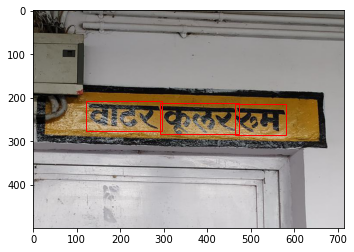

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

im = np.array(Image.open('/content/real_Image_dataset_Detection/Image/0.jpg'), dtype=np.uint8)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im)

with open('/content/real_Image_dataset_Detection/Annotation/0.txt','r') as f:
  for line in f:
    splits = line.split(',')
    if len(splits) != 9:
      continue
    x1,x2,x3,x4,y1,y2,y3,y4,truth_lang = splits
    # Create a Rectangle patch
    rect = patches.Rectangle((float(x1),float(y1)),(float(x3)-float(x1)),(float(y3)-float(y1)),linewidth=1,edgecolor='r',facecolor='none')

    # Add the patch to the Axes
    ax.add_patch(rect)

plt.show()

In [ ]:
def convert(size, box):
    dw = 1./(size[0])
    dh = 1./(size[1])
    x = (box[0] + box[1])/2.0 - 1
    y = (box[2] + box[3])/2.0 - 1
    w = box[1] - box[0]
    h = box[3] - box[2]
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

In [ ]:
remove_chars = len(os.linesep)
classes = ['HINDI','ENGLISH','OTHER']
for txtfile in glob.glob('/content/real_Image_dataset_Detection/Annotation/*.txt'):
  #print(txtfile)
  new_path = Path(txtfile)
  with open(txtfile,'r') as f:
    #print('opened file',txtfile)
    processed_lines = []
    for line in f:
      splits = line.split(',')
      if len(splits) != 9:
        continue
      x1,x2,x3,x4,y1,y2,y3,y4,truth_lang = splits
      new_path_parts = list(new_path.parts)
      new_path_parts[-2] = 'Image'
      new_path_parts[-1] = str(new_path_parts[-1][:-4])+'.jpg'
      img = Image.open(str(Path(*new_path_parts)))
      width, height = img.size
      img.close()
      x,y,w,h = convert((width,height),[float(x1),float(x3),float(y1),float(y3)])
      processed_lines.append('{0} {1} {2} {3} {4}\n'.format(
          classes.index(truth_lang.split('::')[-1][:-1]),
          x,
          y,
          w,
          h
          ))
      #print('class',truth_lang.split('::')[-1][:-1],'bb',int(x1),int(y1),int(x3)-int(x1),(int(y3)-int(y1)))
    #new_path = Path(txtfile)
    new_path_parts = list(new_path.parts)
    new_path_parts[-2] += '_VOC'
    new_path = Path(*(new_path_parts))
    new_path.parent.mkdir(parents=True,exist_ok=True)
    with open(str(new_path),'w') as nf:
        nf.writelines(processed_lines)
        nf.truncate(nf.tell() - remove_chars)
  #break

In [ ]:
image_list = glob.glob('/content/real_Image_dataset_Detection/Image/*.jpg')

In [ ]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(image_list, test_size=0.2)

In [ ]:
print(len(train)/len(image_list))
print(len(val)/len(image_list))

0.7990654205607477
0.20093457943925233


In [ ]:
train

In [ ]:
remove_chars = len(os.linesep)
with open('/content/train.txt','w') as f:
  for t in train:
    f.write(t)
    f.write('\n')
  f.truncate(f.tell() - remove_chars)
with open('/content/val.txt','w') as f:
  for v in val:
    f.write(v)
    f.write('\n')
  f.truncate(f.tell() - remove_chars)

In [ ]:
!cp /content/darknet/cfg/yolov3.cfg /content/yolov3_custom_train.cfg

In [ ]:
!touch /content/yolo.data

In [ ]:
!mkdir /content/backup

In [ ]:
!touch /content/yolo.names

##YOLO

In [ ]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243


In [ ]:
!cat /usr/local/cuda/version.txt

CUDA Version 10.1.243


In [ ]:
!git clone https://github.com/pjreddie/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 5916, done.
remote: Total 5916 (delta 0), reused 0 (delta 0), pack-reused 5916
Receiving objects: 100% (5916/5916), 6.34 MiB | 31.52 MiB/s, done.
Resolving deltas: 100% (3919/3919), done.


In [ ]:
!git clone https://github.com/pjreddie/darknet
%cd darknet
!make
#%cd ..

Cloning into 'darknet'...
remote: Enumerating objects: 5916, done.
remote: Total 5916 (delta 0), reused 0 (delta 0), pack-reused 5916
Receiving objects: 100% (5916/5916), 6.34 MiB | 31.36 MiB/s, done.
Resolving deltas: 100% (3915/3915), done.
/content/darknet
mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.

In [ ]:
%cd /content/darknet
!make -j2

In [ ]:
!cp /content/drive/MyDrive/PadhAI/darknet.conv.74 /content/

In [ ]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2020-12-02 15:10:03--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M   297KB/s    in 11m 33s 

2020-12-02 15:21:37 (350 KB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [ ]:
!pwd

/content/darknet


In [ ]:
!./darknet detect cfg/yolov3.cfg yolov3.weights data/dog.jpg

layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

In [ ]:
%cd /content/
!wget https://pjreddie.com/media/files/darknet53.conv.74

/content
--2020-12-02 17:53:23--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   562KB/s    in 5m 9s   

2020-12-02 17:58:34 (513 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [ ]:
!cp /content/darknet53.conv.74 /content/drive/MyDrive/PadhAI/darknet.conv.74

In [ ]:
!pip install yolov3

     |████████████████████████████████| 327kB 12.9MB/s 
     |████████████████████████████████| 26.6MB 122kB/s 
     |████████████████████████████████| 109.2MB 41kB/s 
     |████████████████████████████████| 12.2MB 30.0MB/s 
     |████████████████████████████████| 51kB 8.7MB/s 
     |████████████████████████████████| 491kB 53.2MB/s 
     |████████████████████████████████| 3.2MB 51.8MB/s 
ERROR: xarray 0.15.1 has requirement numpy>=1.15, but you'll have numpy 1.14.4 which is incompatible.
ERROR: umap-learn 0.4.6 has requirement numpy>=1.17, but you'll have numpy 1.14.4 which is incompatible.
ERROR: tifffile 2020.9.3 has requirement numpy>=1.15.1, but you'll have numpy 1.14.4 which is incompatible.
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.1.3 which is incompatible.
ERROR: tensorflow 1.14.0 has requirement numpy<2.0,>=1.14.5, but you'll have numpy 1.14.4 which is incompatible.
ERROR: spacy 2.2.4 has requirement numpy>=1.15.0, but you'll have numpy 1.14

In [ ]:
%cd /content/darknet
!./darknet detector train /content/yolo.data /content/yolov3_custom_train.cfg /content/drive/MyDrive/PadhAI/darknet.conv.74

Streaming output truncated to the last 5000 lines.
Region 106 Avg IOU: 0.022482, Class: 0.228332, Obj: 0.013441, No Obj: 0.464804, .5R: 0.000000, .75R: 0.000000,  count: 1
8: 1561.614746, 1563.435425 avg, 0.000000 rate, 8.775341 seconds, 512 images
Loaded: 0.000061 seconds
Region 82 Avg IOU: 0.172030, Class: 0.602175, Obj: 0.473786, No Obj: 0.444143, .5R: 0.125000, .75R: 0.000000,  count: 8
Region 94 Avg IOU: 0.263468, Class: 0.736651, Obj: 0.216002, No Obj: 0.459125, .5R: 0.000000, .75R: 0.000000,  count: 1
Region 106 Avg IOU: 0.105168, Class: 0.454520, Obj: 0.458333, No Obj: 0.463918, .5R: 0.000000, .75R: 0.000000,  count: 3
Region 82 Avg IOU: 0.127808, Class: 0.769909, Obj: 0.337186, No Obj: 0.443928, .5R: 0.000000, .75R: 0.000000,  count: 4
Region 94 Avg IOU: 0.109540, Class: 0.713146, Obj: 0.327300, No Obj: 0.459702, .5R: 0.000000, .75R: 0.000000,  count: 4
Region 106 Avg IOU: 0.151729, Class: 0.573332, Obj: 0.498547, No Obj: 0.465928, .5R: 0.071429, .75R: 0.000000,  count: 14
Reg

In [ ]:
!cp /content/real_Image_dataset_Detection/Annotation_VOC/* /content/real_Image_dataset_Detection/Image/

In [ ]:
%cd /content/darknet
!./darknet detector test /content/yolo.data /content/yolov3_custom_train.cfg /content/backup/yolov3_custom_train_100.weights /content/real_Image_dataset_Detection/Image/0.jpg

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8      

In [ ]:
!cp /content/drive/MyDrive/PadhAI/yolov3.weights

In [ ]:
%cd /content/darknet
!./darknet detector test cfg/coco.data cfg/yolov3.cfg /content/drive/MyDrive/PadhAI/yolov3.weights data/dog.jpg -out /content/result.json

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8      

In [ ]:
%cd /content/darknet
!./darknet detector test /content/yolo.data /content/yolov3_custom_train.cfg /content/backup/yolov3_custom_train_100.weights '/content/real_Image_dataset_Detection/Image/103. gurgaon_1460298928.jpg' -out /content/result.json -thresh 0.84

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8      

In [ ]:
%cd /content/darknet
!./darknet detect /content/yolov3_custom_train.cfg /content/backup/yolov3_custom_train_100.weights

/content/darknet
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32  0.299 BFLOPs
    1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32  0.177 BFLOPs
    3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64  1.595 BFLOPs
    4 res    1                 208 x 208 x  64   ->   208 x 208 x  64
    5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
    7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
    8 res    5                 104 x 104 x 128   ->   104 x 104 x 128
    9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64  0.177 BFLOPs
   10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128  1.595 BFLOPs
   11 res    8      

#Testing custom training

In [ ]:
%cd /content
!wget https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
!wget https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
!wget https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
!tar xf VOCtrainval_11-May-2012.tar
!tar xf VOCtrainval_06-Nov-2007.tar
!tar xf VOCtest_06-Nov-2007.tar

/content
--2020-12-02 16:17:18--  https://pjreddie.com/media/files/VOCtrainval_11-May-2012.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1999639040 (1.9G) [application/octet-stream]
Saving to: ‘VOCtrainval_11-May-2012.tar’

OCtrainval_11-May-2   0%[                    ]   5.23M   348KB/s    eta 75m 41s^C
--2020-12-02 16:17:31--  https://pjreddie.com/media/files/VOCtrainval_06-Nov-2007.tar
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 460032000 (439M) [application/octet-stream]
Saving to: ‘VOCtrainval_06-Nov-2007.tar’

OCtrainval_06-Nov-2   0%[                    ] 807.70K   322KB/s               ^C
--2020-12-02 16:17:35--  https://pjreddie.com/media/files/VOCtest_06-Nov-2007.tar
Resolving pjreddie.com (pjredd

### Training YOLO

In [ ]:
!./darknet detector train cfg/voc.data cfg/yolov3-voc.cfg darknet53.conv.74

###Copy Files to drive

In [ ]:
!cp /content/yolo* /content/drive/MyDrive/PadhAI

In [ ]:
!cp /content/train.txt /content/val.txt /content/drive/MyDrive/PadhAI

# Testing COCO Dataset

In [ ]:
!git clone https://github.com/pdollar/coco.git

Cloning into 'coco'...
remote: Enumerating objects: 975, done.
remote: Total 975 (delta 0), reused 0 (delta 0), pack-reused 975
Receiving objects: 100% (975/975), 11.72 MiB | 7.31 MiB/s, done.
Resolving deltas: 100% (576/576), done.


In [ ]:
%cd coco/PythonAPI/
!make
!python setup.py build
!python setup.py install
%cd /content

In [ ]:
!git clone https://github.com/yunjey/pytorch-tutorial.git
%cd pytorch-tutorial/tutorials/03-advanced/image_captioning/
!pip install -r requirements.txt
%cd /content

fatal: destination path 'pytorch-tutorial' already exists and is not an empty directory.
/content/pytorch-tutorial/tutorials/03-advanced/image_captioning


/content


In [ ]:
%cd pytorch-tutorial/tutorials/03-advanced/image_captioning/
!chmod +x download.sh
!./download.sh
%cd /content

/content/pytorch-tutorial/tutorials/03-advanced/image_captioning
mkdir: cannot create directory ‘data’: File exists
--2020-12-10 12:42:51--  http://msvocds.blob.core.windows.net/annotations-1-0-3/captions_train-val2014.zip
Resolving msvocds.blob.core.windows.net (msvocds.blob.core.windows.net)... 52.176.224.96
Connecting to msvocds.blob.core.windows.net (msvocds.blob.core.windows.net)|52.176.224.96|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19673183 (19M) [application/octet-stream Charset=UTF-8]
Saving to: ‘./data/captions_train-val2014.zip.1’

captions_train-val2 100%[===================>]  18.76M  5.02MB/s    in 4.8s    

2020-12-10 12:42:56 (3.93 MB/s) - ‘./data/captions_train-val2014.zip.1’ saved [19673183/19673183]

--2020-12-10 12:42:56--  http://images.cocodataset.org/zips/val2014.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.109.139
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.109.139|:80... connect

In [ ]:
!unzip /content/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/captions_train-val2014.zipA


Archive:  /content/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/captions_train-val2014.zip
replace annotations/captions_train2014.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [ ]:
!unzip /content/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/captions_train-val2014.zip

Archive:  /content/pytorch-tutorial/tutorials/03-advanced/image_captioning/data/captions_train-val2014.zip
  inflating: annotations/captions_train2014.json  
  inflating: annotations/captions_val2014.json  


In [ ]:
!python /content/pytorch-tutorial/tutorials/03-advanced/image_captioning/sample.py

usage: sample.py [-h] --image IMAGE [--encoder_path ENCODER_PATH]
                 [--decoder_path DECODER_PATH] [--vocab_path VOCAB_PATH]
                 [--embed_size EMBED_SIZE] [--hidden_size HIDDEN_SIZE]
                 [--num_layers NUM_LAYERS]
sample.py: error: the following arguments are required: --image


# Neural Machine Translation with Attention

## Clone the repository

for data

In [ ]:
!git clone https://github.com/IamShivamJaiswal/sign-board

fatal: destination path 'sign-board' already exists and is not an empty directory.


This notebook trains a sequence to sequence (seq2seq) model for Hindi to English word translation. This is an advanced example that assumes some knowledge of sequence to sequence models.

After training the model in this notebook, you will be able to input a english word, such as *"pratik"*, and return the Hindi translation: *"प्रतीक"*

The translation quality is reasonable for a toy example, but the generated attention plot is perhaps more interesting.

In [ ]:
from __future__ import absolute_import, division, print_function

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os
import io
import time
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import unicodedata
import re
import time

2.0.0-rc0


## Preprocessing

1. Add a *start* as `0` and *end* as `1` token to each sentence.
2. Clean the sentences by removing special characters.
3. Create a word index and reverse word index (dictionaries mapping from word → id and id → word).
4. Pad each sentence to a maximum length.

In [ ]:
def unicode_to_ascii(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
    w = unicode_to_ascii(w.lower().strip())
    w = w.replace('-', ' ').replace(',', ' ')

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
    w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '0' + w + '1'
    return w.split()

def preprocess_sentence_hindi(w):
    w = unicode_to_ascii(w.lower().strip())
    w = w.replace('-', ' ').replace(',', ' ')

    # creating a space between a word and the punctuation following it
    # eg: "he is a boy." => "he is a boy ."
    # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
    w = re.sub(r"([?.!,¿])", r" \1 ", w)
    w = re.sub(r'[" "]+', " ", w)

    w = w.rstrip().strip()

    # adding a start and an end token to the sentence
    # so that the model know when to start and stop predicting.
    w = '0' + w + '1'
    return w.split()

In [ ]:
word = "shivam"
hindi = "शिवम"
print(preprocess_sentence(word))
print(preprocess_sentence_hindi(hindi))

['0shivam1']
['0शिवम1']


In [ ]:
import xml.etree.ElementTree as ET
def create_dataset(filename):

    transliterationCorpus = ET.parse(filename).getroot()
    lang1_words = []
    lang2_words = []

    for line in transliterationCorpus:
                wordlist1 = preprocess_sentence(line[0].text) # clean English words.
                wordlist2 = preprocess_sentence_hindi(line[1].text)# clean hindi words.

                #to check consistency in the input vs output mapping
                if len(wordlist1) != len(wordlist2):
                    print('Skipping: ', line[0].text, ' - ', line[1].text)
                    continue

                for word in wordlist1:
                    lang1_words.append(word)
                for word in wordlist2:
                    lang2_words.append(word)
    return [lang1_words,lang2_words]

In [ ]:
PATH = "/content/sign-board/transliteration/data/"

train_data = create_dataset(PATH+'NEWS2012TrainingEnHi.xml')
test_data = create_dataset(PATH+'NEWS2012TestingEnHi1000.xml')

Skipping:  BUSHNELL'S MUSEUM  -  बुशनेल्स म्युज़ियम
Skipping:  I^DUKAANT  -  इंदुकांत
Skipping:  THE AUSTRALIAN/VOGEL LITERARY AWARD  -  द ऑस्ट्रेलियन/वोगेल लिट्रेरी अवार्ड
Skipping:  PLAZA 66  -  प्लाज़ा 66
Skipping:  Bhaalachan_dr  -  भालचन्द्र
Skipping:  MAN OF THE YEAR/PERSON OF THE YEAR  -  मैन ऑफ द ईयर/पर्सन ऑफ द ईयर
Skipping:  BARHARWA JUNCTION  -  बरहरवा
Skipping:  QUEEN ANNE'S WAR  -  क्वीन एनीज वार
Skipping:  STATE BNK TR  -  स्टेट बैंक ऑफ त्रावणकोर
Skipping:  IN_DRAJEET  -  इन्द्रजीत
Skipping:  SAINT FRANCIS D'ASSISI HIGH SCHOOL  -  सेंट फ्रांसिस ड‍िअस‍ीसी हाई स्कूल
Skipping:  SHU'A  -  शुआ
Skipping:  SOUTH ARLINGTON CHURCH OF CHRIST  -  साउथ अर्लिंग्टन
Skipping:  I^diyaa  -  इंडिया
Skipping:  DAI'EI  -  दैई
Skipping:  ISMA'IL  -  इस्मा'ईल
Skipping:  WOMEN'S LITERATURE PRIZE  -  वुमेन्स लिट्रेचर प्राइज़
Skipping:  KING EDWARD VII  -  किंग एडवर्ड
Skipping:  BRAJEN_DR  -  ब्रजेन्द्र
Skipping:  DIBANG VALLEY  -  दिबंगवैली
Skipping:  LU'LU  -  लु'लु
Skipping:  CHITTAR RESERVOIR-2 

In [ ]:
train_data[0][:10],train_data[1][:10]

(['0raasavihaaree1',
  '0deogan',
  'road1',
  '0shatrumardan1',
  '0mahijuba1',
  '0sabine1',
  '0bill',
  'cosby1',
  '0rishta',
  'kagaz'],
 ['0रासविहारी1',
  '0दवगन',
  'रोड1',
  '0शतरमरदन1',
  '0महिजबा1',
  '0सबिन1',
  '0बिल',
  'कॉसबी1',
  '0रिशता',
  'कागज'])

In [ ]:
print(len(train_data[0]),len(train_data[1]))

20382 20382


In [ ]:
class WordIndex():
  def __init__(self, lang):
    self.lang = lang
    self.word2idx = {}
    self.idx2word = {}
    self.vocab = set()

    self.create_index()

  def create_index(self):
    for phrase in self.lang:
      for l in phrase:
        self.vocab.update(l)

    self.vocab = sorted(self.vocab)

    self.word2idx['<pad>'] = 0
    for index, word in enumerate(self.vocab):
      self.word2idx[word] = index + 1

    for word, index in self.word2idx.items():
      self.idx2word[index] = word


In [ ]:
def tokenize(lang):
  index_lang  = WordIndex(lang)
  input_tensor = [[index_lang.word2idx[s] for s in en] for en in lang]
  max_length = max(len(t) for t in input_tensor)
  input_tensor = tf.keras.preprocessing.sequence.pad_sequences(input_tensor,
                                                                 maxlen=max_length,
                                                                 padding='post')
  return input_tensor, index_lang , max_length

In [ ]:
def max_length(tensor):
    return max(len(t) for t in tensor)


def load_dataset(pairs):


    # index language using the class defined above
    targ_lang, inp_lang = pairs[1],pairs[0]

    input_tensor, inp_lang_tokenizer ,max_length_inp = tokenize(inp_lang)

    target_tensor, targ_lang_tokenizer,max_length_tar = tokenize(targ_lang)

    return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer,max_length_inp,max_length_tar

In [ ]:
input_tensor, target_tensor, inp_lang, targ_lang,max_length_inp, max_length_targ = load_dataset(train_data)

In [ ]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.idx2word[t]))

In [ ]:
convert(inp_lang,input_tensor[-1])
convert(targ_lang,target_tensor[-1])

6 ----> b
19 ----> o
24 ----> t
12 ----> h
5 ----> a
17 ----> m
3 ----> 1
40 ----> ब
55 ----> ो
34 ----> थ
42 ----> म
5 ----> 1


In [ ]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.05)

# Show length
len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val)

(19362, 19362, 1020, 1020)

In [ ]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 128
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word2idx)+1
vocab_tar_size = len(targ_lang.word2idx)+1

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([128, 22]), TensorShape([128, 16]))

## Write the encoder and decoder model

Implement an encoder-decoder model with attention which you can read about in the TensorFlow [Neural Machine Translation (seq2seq) tutorial](https://github.com/tensorflow/nmt). This example uses a more recent set of APIs. This notebook implements the [attention equations](https://github.com/tensorflow/nmt#background-on-the-attention-mechanism) from the seq2seq tutorial. The following diagram shows that each input words is assigned a weight by the attention mechanism which is then used by the decoder to predict the next word in the sentence. The below picture and formulas are an example of attention mechanism from [Luong's paper](https://arxiv.org/abs/1508.04025v5).

<img src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg" width="500" alt="attention mechanism">

The input is put through an encoder model which gives us the encoder output of shape *(batch_size, max_length, hidden_size)* and the encoder hidden state of shape *(batch_size, hidden_size)*.

Here are the equations that are implemented:

<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg" alt="attention equation 0" width="800">
<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_1.jpg" alt="attention equation 1" width="800">

This tutorial uses [Bahdanau attention](https://arxiv.org/pdf/1409.0473.pdf) for the encoder. Let's decide on notation before writing the simplified form:

* FC = Fully connected (dense) layer
* EO = Encoder output
* H = hidden state
* X = input to the decoder

And the pseudo-code:

* `score = FC(tanh(FC(EO) + FC(H)))`
* `attention weights = softmax(score, axis = 1)`. Softmax by default is applied on the last axis but here we want to apply it on the *1st axis*, since the shape of score is *(batch_size, max_length, hidden_size)*. `Max_length` is the length of our input. Since we are trying to assign a weight to each input, softmax should be applied on that axis.
* `context vector = sum(attention weights * EO, axis = 1)`. Same reason as above for choosing axis as 1.
* `embedding output` = The input to the decoder X is passed through an embedding layer.
* `merged vector = concat(embedding output, context vector)`
* This merged vector is then given to the GRU

The shapes of all the vectors at each step have been specified in the comments in the code:

In [ ]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [ ]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (128, 22, 1024)
Encoder Hidden state shape: (batch size, units) (128, 1024)


In [ ]:
class BahdanauAttention(tf.keras.Model):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [ ]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (128, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (128, 22, 1)


In [ ]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)


    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [ ]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((128, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (128, 60)


## Define the optimizer and the loss function

In [ ]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask*1.5

  return tf.reduce_mean(loss_)

## Checkpoints (Object-based saving)

In [ ]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

## Training

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [ ]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word2idx['0']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [ ]:
EPOCHS = 20

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
        print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                     batch,
                                                     batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 2.0303
Epoch 1 Batch 100 Loss 1.4273
Epoch 1 Loss 1.4241
Time taken for 1 epoch 78.82020926475525 sec

Epoch 2 Batch 0 Loss 1.4202
Epoch 2 Batch 100 Loss 1.0258
Epoch 2 Loss 1.1526
Time taken for 1 epoch 52.72335362434387 sec

Epoch 3 Batch 0 Loss 0.8096
Epoch 3 Batch 100 Loss 0.3997
Epoch 3 Loss 0.4908
Time taken for 1 epoch 52.584853410720825 sec

Epoch 4 Batch 0 Loss 0.3485
Epoch 4 Batch 100 Loss 0.2975
Epoch 4 Loss 0.2944
Time taken for 1 epoch 52.889031410217285 sec

Epoch 5 Batch 0 Loss 0.2342
Epoch 5 Batch 100 Loss 0.1873
Epoch 5 Loss 0.2324
Time taken for 1 epoch 52.56991386413574 sec

Epoch 6 Batch 0 Loss 0.1715
Epoch 6 Batch 100 Loss 0.1998
Epoch 6 Loss 0.1967
Time taken for 1 epoch 52.88166952133179 sec

Epoch 7 Batch 0 Loss 0.1578
Epoch 7 Batch 100 Loss 0.2225
Epoch 7 Loss 0.1665
Time taken for 1 epoch 52.46126651763916 sec

Epoch 8 Batch 0 Loss 0.1188
Epoch 8 Batch 100 Loss 0.1245
Epoch 8 Loss 0.1418
Time taken for 1 epoch 52.85922598838806 sec

Epoch 

## Translitrate

* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [ ]:
def evaluate(sentence):
    attention_plot = np.zeros((max_length_targ, max_length_inp))

    sentence = preprocess_sentence(sentence)[0]

    inputs = [inp_lang.word2idx[i] for i in sentence]

    inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                           maxlen=max_length_inp,
                                                           padding='post')
    inputs = tf.convert_to_tensor(inputs)

    result = ''

    hidden = [tf.zeros((1, units))]
    enc_out, enc_hidden = encoder(inputs, hidden)

    dec_hidden = enc_hidden
    dec_input = tf.expand_dims([targ_lang.word2idx['0']], 0)

    for t in range(max_length_targ):
        predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                             dec_hidden,
                                                             enc_out)

        # storing the attention weights to plot later on
        attention_weights = tf.reshape(attention_weights, (-1, ))
        attention_plot[t] = attention_weights.numpy()

        predicted_id = tf.argmax(predictions[0]).numpy()

        result += targ_lang.idx2word[predicted_id] + ' '

        if targ_lang.idx2word[predicted_id] == '1':
            return result, sentence, attention_plot

        # the predicted ID is fed back into the model
        dec_input = tf.expand_dims([predicted_id], 0)

    return result, sentence, attention_plot

In [ ]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):

    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

In [ ]:
def translitrate(sentence):
    result, sentence, attention_plot = evaluate(sentence)

    print('Input: %s' % (sentence[1:-1]))
    print('Predicted translation: {}'.format(''.join(result.split(' '))[:-1]))

    attention_plot = attention_plot[:len(result.split(' ')), :len(list(sentence))]
    plot_attention(attention_plot, list(sentence), result.split(' '))


## Restore the latest checkpoint and test

In [ ]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))

Input: shivam
Predicted translation: शिवम


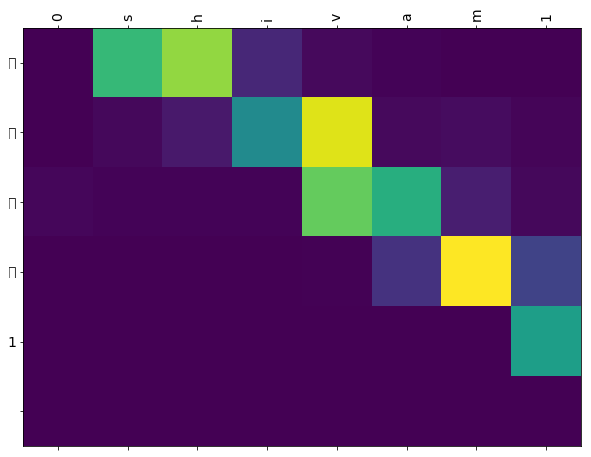

In [ ]:
translitrate('shivam')

Input: jaiswal
Predicted translation: जसवाल


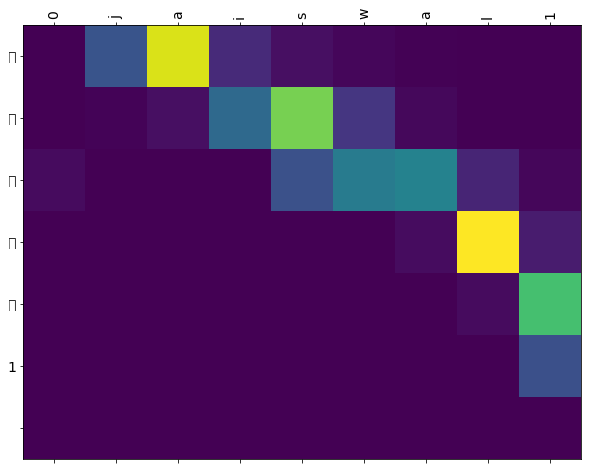

In [ ]:
translitrate('jaiswal')

Input: nachiket
Predicted translation: नचिकत


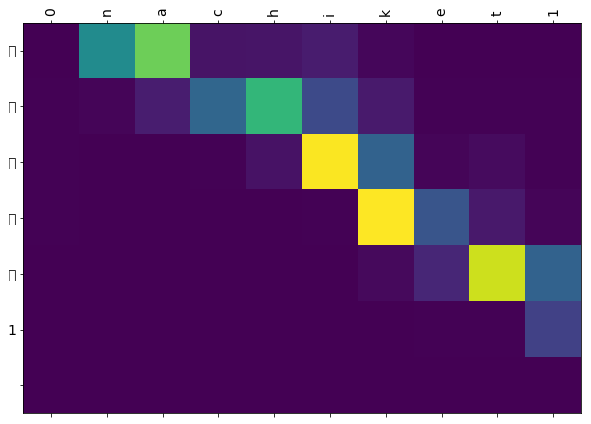

In [ ]:
translitrate("Nachiket")

## Exact Match Accuracy

In [ ]:
def lcs(X, Y):
    # find the length of the strings
    m = len(X)
    n = len(Y)

    # declaring the array for storing the dp values
    L = [[None]*(n + 1) for i in range(m + 1)]

    """Following steps build L[m + 1][n + 1] in bottom up fashion
    Note: L[i][j] contains length of LCS of X[0..i-1]
    and Y[0..j-1]"""
    for i in range(m + 1):
        for j in range(n + 1):
            if i == 0 or j == 0 :
                L[i][j] = 0
            elif X[i-1] == Y[j-1]:
                L[i][j] = L[i-1][j-1]+1
            else:
                L[i][j] = max(L[i-1][j], L[i][j-1])

    # L[m][n] contains the length of LCS of X[0..n-1] & Y[0..m-1]
    return L[m][n]

In [ ]:
def exactmatch(predict,actual):

  #length of Longest Common Subsequence
  l = lcs(predict,actual)

  return l / len(actual)

In [ ]:
len(test_data[0])

1000

In [ ]:
tot = 0.0
for i in range(len(test_data[0])):
  inputstr , resultstr = test_data[0][i][1:-1],test_data[1][i][1:-1]
  result,_,_ = evaluate(inputstr)
  temppredict = ''.join(result.split(' '))[:-1]
  acc = exactmatch(temppredict,resultstr)
  tot = tot + acc
  print(inputstr,resultstr,temppredict,acc)
print("Average acuracy :",tot/len(test_data[0]))

aadhi आधी आधी 1.0
aakash आकाश आकाश 1.0
aap आप आप 1.0
aayasha आयशा आयाशा 1.0
aayee आई आई 1.0
abduh अबदस अबदध 0.75
aberhart एबरहरट अबरहरट 0.8333333333333334
abey अबय अबय 1.0
abou अब अबोउउ 1.0
abri एबरी अबरी 0.75
academy अकडमी एकडमी 0.8
accommodation एकोमडशन एकोमोडशन 1.0
acorn एकोरन एकोरन 1.0
adams एडमस एडमस 1.0
adgaon अदगाव अदगाव 1.0
adlabs एडलबस एडलाबस 1.0
agro एगरो अगरो 0.75
ahlaad आहलाद आहलाद 1.0
air एअर ऐर 0.3333333333333333
aisin एसिन ऐसीन 0.5
ajee अजी अजी 1.0
ajhai अझाई अजहाई 0.75
ajith अजीथ अज‍िथ 0.75
akaram अकरम आकरम 0.75
akele अकल एकल 0.6666666666666666
akhri आखिरी आखि 0.6
akodia अकोडिया अकोडिया 1.0
akurdi अकरडी अकरडी 1.0
alas अलास अलास 1.0
albany अलबान अलबनी 0.8
alester एलसटर एलसटर 1.0
alex एलकस अलकस 0.75
alipur अलीपर अलीपर 1.0
alkali अलकली अलकली 1.0
alpesh अलपश अलपश 1.0
amanat अमानत अमानत 1.0
american अमरिकन अमरिकन 1.0
amodini अमोदिनी अमोदिनी 1.0
andha अधा अधा 1.0
angel एजल एजल 1.0
anna अनना एना 0.5
anne एनी एनी 1.0
antibody एटीबॉडी एटीबोडी 0.8571428571428571
aon एऑन औन 0.3333